# **Clustering Analysis:**

-----

Clustering is an unsupervised learning technique that groups similar data points together based on their features. 

The goal is to identify patterns or structures within the data without prior labels. 

Common algorithms for clustering include `K-means Clustering` `hierarchical Clustering`, and `DBSCAN`.

Clustering is useful for tasks such as `Customer Segmentation`, `Anomaly Detection`, and `Organizing Large Datasets`.

In [ ]:
# Import Necessary Dependencies:

from data_preparation import data_loader
data= data_loader()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# List out all the available plot styles in metplotlib and seaborn:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [46]:
# Set the style
plt.style.use('seaborn-v0_8-bright')
# Set themes
sns.set_theme()

#### **`Data Preparation`**: **Select relevant features and handle missing values.**

I use **`unsupervised machine learning technique`**, called **`K-Means Clustering`** to Cluster countries. This groups the countries into clusters based on their similarity in features like `suicides/100k pop`, `HDI`, `GDP`, and `population`. 

##### **`General Procedure for Clustering:`**

1. Select relevant features (`suicides/100k pop`, `HDI`, `GDP`, `population`) for clustering.

2. Normalize the data to ensure all features are on the same scale.

3. Use **`K-Means Clustering`**, which partitions the data into `k` clusters by minimizing the variance within each cluster.

4. Determine the optimal number of clusters (`k`) using the **`Elbow Method`**.

5. Visualize the clusters using scatter plots or other techniques to interpret the results.


A issue will arises later(`Single Country Belonging to Multiple Clusters`) because the dataset contains multiple rows for each country (e.g., for different years, age groups, or other dimensions). I need to fix this; and to fix this; one of the easiest way is to **`aggregate the data`** so that each country has a single row with aggregated values for the selected features.

1. **`Aggregate the Data by Country`**:  Use the `groupby` method to group the data by the `country` column and calculate the mean for the selected features.

2. **`Ensure Unique Rows per Country`**:  After aggregation, each country will have a single row in the dataset.

In [30]:
# Select relevant columns for clustering, including 'country':
features = ['country', 'suicides/100kpop', 'HDIforyear', 'gdp_per_capita()', 'population']

# Group by 'country' and calculate the mean for the selected features:
clustering_data = data[features].groupby('country').mean().reset_index()

# Drop rows with missing values (there will be no):
clustering_data = clustering_data.dropna()

# Display the aggregated data:
clustering_data.head()

,country,suicides/100kpop,HDIforyear,gdp_per_capita(),population
0,Albania,3.502879,0.799890,1859.045455,2.360813e+05
1,Antigua and Barbuda,0.552901,0.735890,10448.185185,6.142679e+03
2,Argentina,10.469328,0.728428,7914.096774,2.784907e+06
3,Armenia,3.275872,0.729896,1873.919463,2.595576e+05
4,Aruba,9.503095,0.730168,24221.642857,7.498077e+03


In [31]:
print(f"Number of unique countries: {clustering_data.shape[0]}")

Number of unique countries: 101


In [32]:
clustering_data.shape

(101, 5)

After this, the `clustering_data DataFrame` will have **one row per country** with aggregated values for the selected features.

In [33]:
# Normalize the data using StandardScaler: Standerization of the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.drop(columns= ["country"]))

# Convert scaled data back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_data, columns=clustering_data.columns[1:])
scaled_df["country"]= clustering_data["country"]
scaled_df.head()

,suicides/100kpop,HDIforyear,gdp_per_capita(),population,country
0,-0.917754,0.502268,-0.863833,-0.424329,Albania
1,-1.235395,-0.643515,-0.336468,-0.498000,Antigua and Barbuda
2,-0.167637,-0.777098,-0.492059,0.392293,Argentina
3,-0.942197,-0.750826,-0.862920,-0.416808,Armenia
4,-0.271677,-0.745956,0.509210,-0.497566,Aruba


#### **`Determine Optimal Number of Clusters using Elbow Method`**:   

I use **`Elbow Method`** to find the optimal number of clusters by plotting the **`inertia`** (sum of squared distances to the nearest cluster center) for different values of `k`.

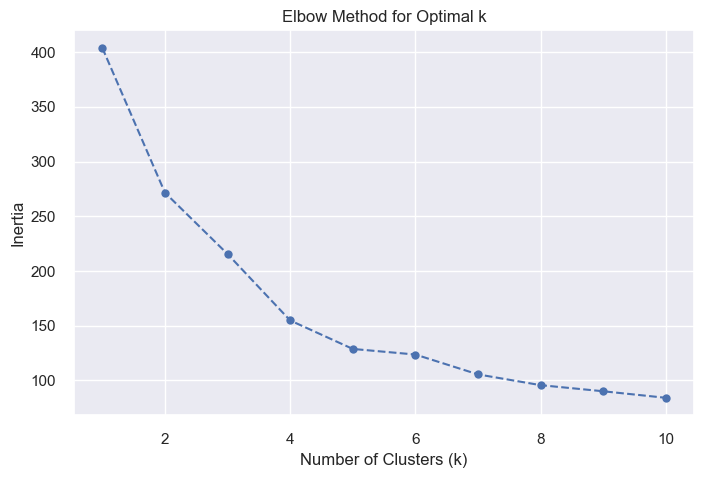

In [47]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# IF SHOWS WARNING, IGNORE IT.

The optimal value of `k` can be determined by identifying the `"elbow point,"` which is the point where the rate of decrease in inertia slows down significantly. This point represents the best trade-off between minimizing inertia (sum of squared distances) and avoiding overfitting with too many clusters.

The plot shows a steep drop in inertia from `k=1` to `k=4`.

After `k=3`, the decrease in inertia becomes more gradual, indicating diminishing returns in adding more clusters.

**Optimal Value of `k`:**
The **optimal value of `k` is 3**, as it is the point where the "elbow" is most prominent. Beyond this point, adding more clusters does not significantly reduce inertia, suggesting that the data is well-represented with 3 clusters.

**Why `k=3` is Optimal:**
- **Interpretability**: Using 3 clusters provides a balance between simplicity and capturing the structure of the data.

- **Diminishing Returns**: Beyond `k=3`, the reduction in inertia is minimal, meaning additional clusters do not add much value.

- **Avoiding Overfitting**: Choosing a higher `k` may lead to overfitting, where clusters are too specific and fail to generalize.

**`Apply K-Means Clustering:`**: I use the optimal number of clusters (`k=3`) determined from the Elbow Method.

In [ ]:
# Apply K-Means with the optimal number of clusters (k=3):
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
clustering_data['Cluster'] = clusters
clustering_data['Cluster'] = clustering_data['Cluster'].astype('category')
clustering_data.head()

,country,suicides/100kpop,HDIforyear,gdp_per_capita(),population,Cluster
0,Albania,3.502879,0.799890,1859.045455,2.360813e+05,0
1,Antigua and Barbuda,0.552901,0.735890,10448.185185,6.142679e+03,0
2,Argentina,10.469328,0.728428,7914.096774,2.784907e+06,0
3,Armenia,3.275872,0.729896,1873.919463,2.595576e+05,0
4,Aruba,9.503095,0.730168,24221.642857,7.498077e+03,0


In [37]:
clustering_data.columns

Index(['country', 'suicides/100kpop', 'HDIforyear', 'gdp_per_capita()',
       'population', 'Cluster'],
      dtype='object')

**Visualize the Clusters**:

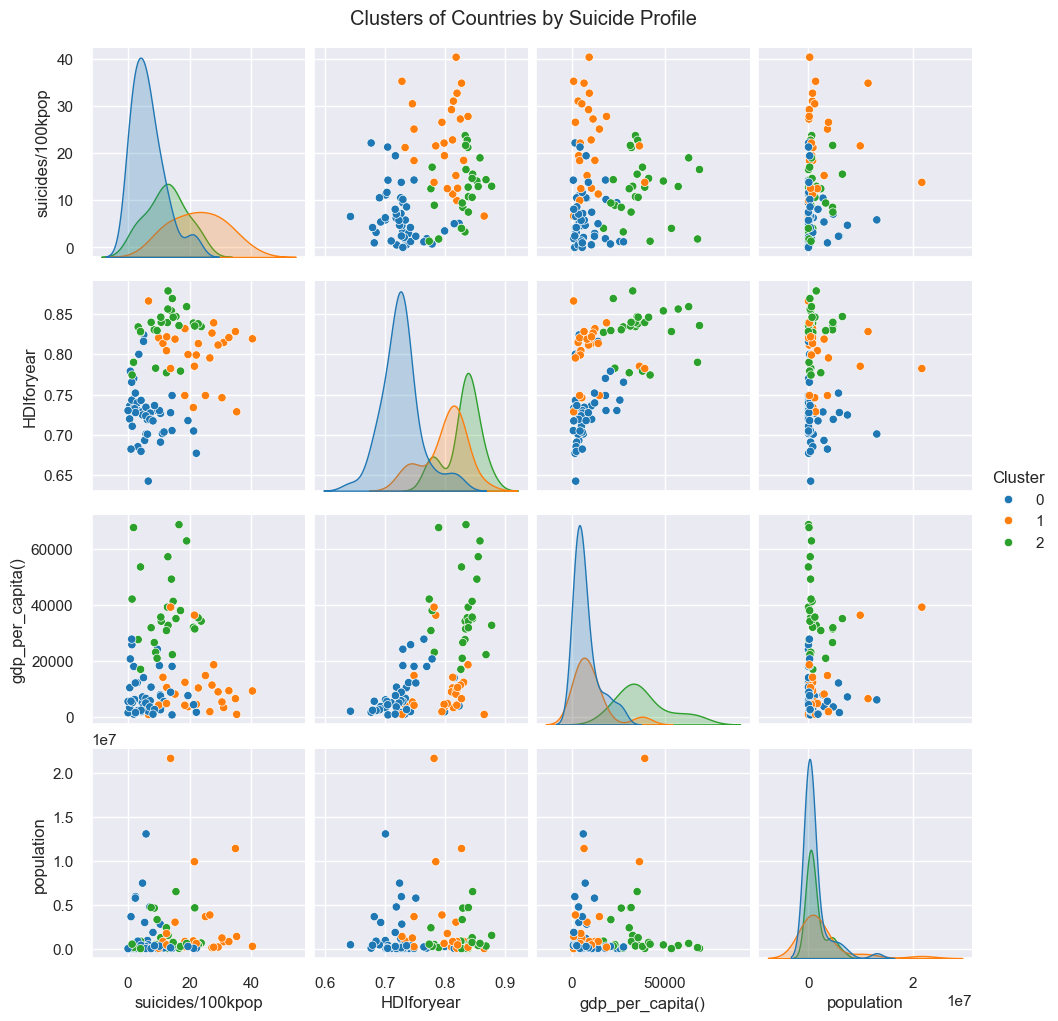

In [48]:
# Visualize clusters using seaborn's pairplot():
sns.pairplot(clustering_data, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle('Clusters of Countries by Suicide Profile', y=1.02)
plt.show()

In [49]:
clustering_data.columns

Index(['country', 'suicides/100kpop', 'HDIforyear', 'gdp_per_capita()',
       'population', 'Cluster'],
      dtype='object')

In [50]:
clustering_data.shape

(101, 6)

In [51]:
clustering_data.head()

,country,suicides/100kpop,HDIforyear,gdp_per_capita(),population,Cluster
0,Albania,3.502879,0.799890,1859.045455,2.360813e+05,0
1,Antigua and Barbuda,0.552901,0.735890,10448.185185,6.142679e+03,0
2,Argentina,10.469328,0.728428,7914.096774,2.784907e+06,0
3,Armenia,3.275872,0.729896,1873.919463,2.595576e+05,0
4,Aruba,9.503095,0.730168,24221.642857,7.498077e+03,0


In [52]:
clustering_data["Cluster"].unique()

[0, 2, 1]
Categories (3, int32): [0, 1, 2]

**Cluster Characteristics**:
   
- Each cluster represents a group of countries with similar suicide profiles.

- For example:
   - `Cluster 0`: High suicide rates, low HDI, and low GDP.

   - `Cluster 1`: Moderate suicide rates, high HDI, and high GDP.
   
   - `Cluster 2`: Low suicide rates, low population, and low GDP.

- Countries in the same cluster may benefit from similar mental health interventions or economic policies.

**Find the Country Names of Each Cluster:**

In [53]:
clustering_data.columns

Index(['country', 'suicides/100kpop', 'HDIforyear', 'gdp_per_capita()',
       'population', 'Cluster'],
      dtype='object')

In [54]:
clustering_data.head()

,country,suicides/100kpop,HDIforyear,gdp_per_capita(),population,Cluster
0,Albania,3.502879,0.799890,1859.045455,2.360813e+05,0
1,Antigua and Barbuda,0.552901,0.735890,10448.185185,6.142679e+03,0
2,Argentina,10.469328,0.728428,7914.096774,2.784907e+06,0
3,Armenia,3.275872,0.729896,1873.919463,2.595576e+05,0
4,Aruba,9.503095,0.730168,24221.642857,7.498077e+03,0


In [55]:
# Group countries by their cluster and get unique country names:
countries_by_cluster = clustering_data.groupby('Cluster')['country'].unique()

# Display the countries in each cluster:
for cluster, countries in countries_by_cluster.items():
    print(f"Cluster {cluster}:")
    print(countries)  # Convert to list or any other python object for better readability if you want
    print("\n")

Cluster 0:
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belize'
 'Bosnia and Herzegovina' 'Brazil' 'Cabo Verde' 'Chile' 'Colombia'
 'Costa Rica' 'Dominica' 'Ecuador' 'El Salvador' 'Fiji' 'Georgia'
 'Grenada' 'Guatemala' 'Guyana' 'Jamaica' 'Kuwait' 'Kyrgyzstan' 'Macau'
 'Maldives' 'Malta' 'Mauritius' 'Mexico' 'Nicaragua' 'Oman' 'Panama'
 'Paraguay' 'Philippines' 'Puerto Rico' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Saint Vincent and Grenadines' 'Seychelles' 'South Africa'
 'Suriname' 'Thailand' 'Trinidad and Tobago' 'Turkey' 'Turkmenistan'
 'Uruguay' 'Uzbekistan']


Cluster 1:
['Belarus' 'Bulgaria' 'Croatia' 'Cuba' 'Czech Republic' 'Estonia'
 'Hungary' 'Japan' 'Kazakhstan' 'Kiribati' 'Latvia' 'Lithuania' 'Mongolia'
 'Montenegro' 'Poland' 'Portugal' 'Republic of Korea' 'Romania'
 'Russian Federation' 'Serbia' 'Slovakia' 'Slovenia' 'Sri Lanka' 'Ukraine'
 'United States']


Cluster 2:
['Australia' 'Austria' 'Belgium' 'Canada' 